### 01 packages

In [1]:
##########################################################################################
##########################################################################################

import matplotlib

import matplotlib.pyplot as plt

from matplotlib.ticker import MultipleLocator, FormatStrFormatter

##########################################################################################
##########################################################################################

import numpy as np

import pandas as pd

import random

##########################################################################################
##########################################################################################

from scipy.stats import truncnorm

from shapely.geometry import Point,Polygon

import networkx as nx

import math

##########################################################################################
##########################################################################################

import warnings

warnings.filterwarnings("ignore")

### 02 parameters

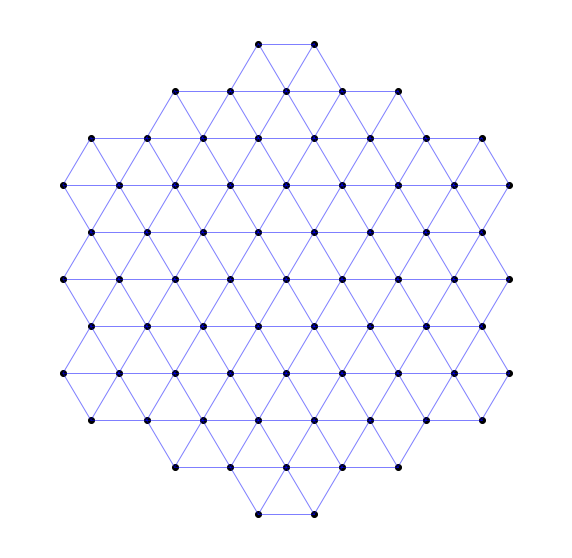

In [2]:
##########################################################################################
##########################################################################################

Hexagons=np.load('./01network/01/Hexagons.npy')

Hexagon_Layer=np.load('./01network/01/Hexagon_Layer.npy',allow_pickle=True).item()


##########################################################################################
##########################################################################################

Hexagon_nodes=np.load("./01network/01/Hexagon_nodes.npy",allow_pickle=True).item()

Hexagon_edges=np.load("./01network/01/Hexagon_edges.npy",allow_pickle=True).item()

##########################################################################################
##########################################################################################

Nodes=np.load("./01network/01/Nodes.npy")

Edges=np.load("./01network/01/Edges.npy")

##########################################################################################
##########################################################################################

Road_Graph = nx.Graph()

for node in Nodes:
    
    node=tuple(node)
        
    Road_Graph.add_node(node)

for edge in Edges:
    
    node1=tuple(edge[0])
    
    node2=tuple(edge[1])
    
    Road_Graph.add_edge(node1, node2, weight=Point(node1).distance(Point(node2)))


##########################################################################################
##########################################################################################

figsize = 10,10

font_title = {'family' : 'Arial','weight' : 'normal','size': 40}

font_label = {'family' : 'Arial','weight' : 'normal','size': 20}

font_legend = {'family' : 'Arial','weight' : 'normal','size': 15}

figure, axs = plt.subplots(figsize=figsize)

labels = axs.get_xticklabels() + axs.get_yticklabels()

[label.set_fontsize(15) for label in labels]

[label.set_fontname('Arial') for label in labels]
    
axs.set_xlabel('X',font_label)

axs.set_ylabel('Y',font_label)

axs.set_xlim([-5000,5000])

axs.set_ylim([-5000,5000])
    
for edge in Road_Graph.edges:
    
    axs.plot([edge[0][0],edge[1][0]],[edge[0][1],edge[1][1]], color='blue',linewidth=1,linestyle='-',alpha=.5)

for node in Road_Graph.nodes:
    
    axs.scatter(node[0], node[1], color='black')

    
# Hide the x and y axes
plt.axis('off')

plt.show()


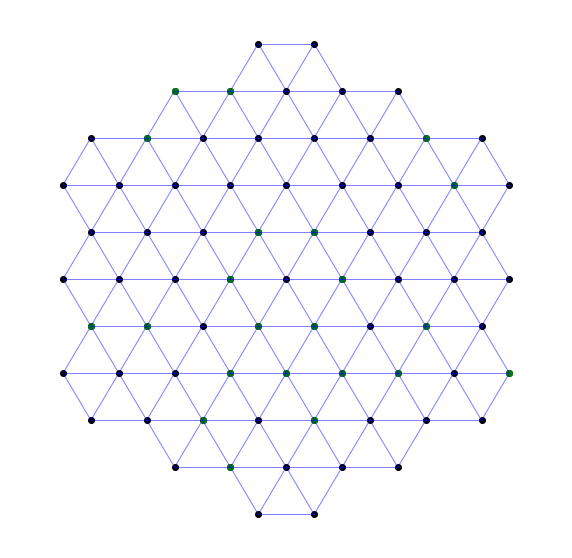

In [3]:
##########################################################################################
##########################################################################################

distributions={0:4,1:2,2:1}

##########################################################################################
##########################################################################################
 
courier_ids=list()

courier_nodes=list()

courier_hexagons=list()

idx=0

for hexagon in Hexagons:
    
    layer=Hexagon_Layer[hexagon]
    
    nums=distributions[layer]
    
    for i in range(nums):
        
        idx+=1
        
        courier_id='c'+str(idx)
        
        courier_ids.append(courier_id)
        
        courier_nodes.append(random.choice(Hexagon_nodes[hexagon]))
        
        courier_hexagons.append(hexagon)

courier_df=pd.DataFrame([])

courier_df['courier_id']=courier_ids

courier_df['courier_coord']=courier_nodes

courier_df['t']=0

courier_df['x']=courier_df.apply(lambda x:x.courier_coord[0],axis=1)

courier_df['y']=courier_df.apply(lambda x:x.courier_coord[1],axis=1)

courier_df=courier_df[['courier_id', 't', 'x', 'y']]

courier_df['hexagon']=courier_hexagons

##########################################################################################
##########################################################################################
    
courier_df.to_csv('./02data/01/courier_instance.csv')

##########################################################################################
##########################################################################################
    


figsize = 10,10

font_title = {'family' : 'Arial','weight' : 'normal','size': 40}

font_label = {'family' : 'Arial','weight' : 'normal','size': 20}

font_legend = {'family' : 'Arial','weight' : 'normal','size': 15}

figure, axs = plt.subplots(figsize=figsize)

labels = axs.get_xticklabels() + axs.get_yticklabels()

[label.set_fontsize(15) for label in labels]

[label.set_fontname('Arial') for label in labels]
    
axs.set_xlabel('X',font_label)

axs.set_ylabel('Y',font_label)

axs.set_xlim([-5000,5000])

axs.set_ylim([-5000,5000])
    
for edge in Road_Graph.edges:
    
    axs.plot([edge[0][0],edge[1][0]],[edge[0][1],edge[1][1]], color='blue',linewidth=1,linestyle='-',alpha=.5)

for node in Road_Graph.nodes:
    
    axs.scatter(node[0], node[1], color='black')

    
axs.scatter(courier_df.x, courier_df.y, c='green', label='Couriers', alpha=1)
    
# Hide the x and y axes
plt.axis('off')

plt.show()
